In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## ***Load the Datasets***

In [2]:
# Load the data for each car make
df_merc = pd.read_csv('merc.csv')
df_audi = pd.read_csv('audi.csv')
df_bmw = pd.read_csv('bmw.csv')
df_ford = pd.read_csv('ford.csv') 
df_hyundai = pd.read_csv('hyundai.csv')
df_vw = pd.read_csv('vw.csv')
df_toyota = pd.read_csv('toyota.csv')

In [3]:
# Display each of the dataframes
display(df_merc, df_audi, df_bmw, df_ford, df_hyundai, df_vw, df_toyota)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


We can see that the column names are the same in each of the dataframes, but the make/manufacturer is missing. We are going to concatenate the dataframes together, but first we need to add the make to each dataframe in turn.

In [4]:
df_merc['make'] = 'Mercedes'
df_audi['make'] = 'Audi'
df_bmw['make'] = 'BMW'
df_ford['make'] = 'Ford'
df_hyundai['make'] = 'Hyundai'
df_vw['make'] = 'Volkswagen'
df_toyota['make'] = 'Toyota'

In [5]:
df_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
 9   make          10668 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 833.6+ KB


In [6]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
 9   make          10781 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 842.4+ KB


In [7]:
df_merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
 9   make          13119 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [8]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
 9   make          17965 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.4+ MB


In [9]:
df_hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
 9   make          4860 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 379.8+ KB


In [10]:
df_hyundai.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize', 'make'],
      dtype='object')

From above, we can see that the tax column in the hyundai df is called tax(£). We need to rename this column to be called tax. We will use the rename method and verify that the column rename was successful.

In [11]:
df_hyundai.rename(columns={'tax(£)':'tax'},inplace=True)
df_hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
 9   make          4860 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 379.8+ KB


In [12]:
df_vw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
 9   make          15157 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB


In [13]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
 9   make          6738 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 526.5+ KB


Next, we will concatenate the rows of the dataframes together. The columns remain unchanged. We will also verify total number of rows matches the sum of the rows of the concatenated dataframes.

In [14]:
data = pd.concat([df_merc, df_audi, df_bmw, df_ford, df_hyundai, df_vw, df_toyota], axis=0)
data.reset_index(inplace=True, drop=True)
len(data) == len(df_audi)+len(df_bmw)+len(df_merc)+len(df_ford)+len(df_hyundai)+len(df_vw)+len(df_toyota)

True

In [15]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,Mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,Mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,Mercedes


In [16]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,79288.000000,79288.000000,79288.000000,79288.000000,79288.000000,79288.000000
mean,2017.077162,18105.475520,23215.615806,119.072747,55.678822,1.723745
std,2.152110,10353.436627,21399.737187,65.202159,17.160138,0.591953
min,1970.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10950.000000,7165.000000,125.000000,47.100000,1.300000
50%,2017.000000,15995.000000,17500.000000,145.000000,55.400000,1.600000
75%,2019.000000,22490.000000,32741.250000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## ***Exploratory Data Analysis***

To avoid data snooping of unseen data, we will split the dataframe into train and test before we perform any further analysis. First we define the features and target columns.

In [17]:
# Specify X to be the feature columns only, and y to be the target column
X = data.drop('price', axis=1)

# Specify y to be the target column
y = data['price']

print("The dimension of X is: ", X.shape)
print("The dimension of y is: ", y.shape)

The dimension of X is:  (79288, 9)
The dimension of y is:  (79288,)


### ***Split the data into train and test sets***
Next we split the data into training and testing sets using the train_test_split function from sklearn.

In [18]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.70,
                                                    random_state=42)

Next, we will create a df containing only the training data and testing data.

In [19]:
# Create a dataframe called df consisting of the training data
df = pd.concat([X_train,y_train],axis=1)
print("The dimension of the training df is: ", df.shape)

# Create a dataframe called df_test consisting of the testing data
df_test = pd.concat([X_test,y_test],axis=1)
print("The dimension of the testing df is: ", df_test.shape)

The dimension of the training df is:  (55501, 10)
The dimension of the testing df is:  (23787, 10)


In [20]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,55501.000000,55501.000000,55501.000000,55501.000000,55501.000000,55501.000000
mean,2017.073909,23210.589215,119.354516,55.706600,1.723600,18096.313922
std,2.163975,21419.063920,65.196702,17.265025,0.592539,10318.315193
min,1970.000000,1.000000,0.000000,1.100000,0.000000,675.000000
25%,2016.000000,7132.000000,125.000000,47.100000,1.300000,10988.000000
50%,2017.000000,17442.000000,145.000000,55.400000,1.600000,15995.000000
75%,2019.000000,32717.000000,145.000000,62.800000,2.000000,22490.000000
max,2060.000000,259000.000000,580.000000,470.800000,6.600000,154998.000000


From the summary statistics, we see some cars with engines of zero size, and also some with very low mpg (1.1). We will now examine these low values. First, we will check the value counts of the engineSize variable.

In [21]:
df.engineSize.value_counts()

2.0    17497
1.0    10199
1.5     7168
1.6     4111
3.0     3814
1.2     2809
2.1     2785
1.4     2505
1.8     1145
1.3      924
1.7      534
1.1      410
2.2      306
2.5      302
4.0      257
0.0      176
2.9      125
2.3      113
4.4       57
2.4       51
5.0       34
5.5       27
2.8       25
4.2       19
3.5       18
4.7       17
3.2       17
5.2       15
6.2        9
1.9        8
2.7        7
0.6        5
6.0        2
4.1        2
6.6        2
3.7        2
5.4        1
4.3        1
4.5        1
6.3        1
Name: engineSize, dtype: int64

### ***Replace zero-sized engines with median value***
From above, we see that there are 176 cars with engineSize=0. We believe these values were likely scraped incorrectly, and should be replaced by the median values of the same model. We will create a function that, for each model in the size zero model list, will replace the 0 value with the median engine size from all nonzero engine sizes of that same model.

In [22]:
def replace_engineSize_zero_with_median(df):
    # Filter out the size zero engines
    engineSize_zero = df['engineSize']==0

    # Create a list of the unique models that appear with size zero engines
    size_zero_models = df[engineSize_zero]['model'].unique()
    
    # Calculate the median engineSize for all nonzero engines
    median_sizes = df[~engineSize_zero].groupby('model')['engineSize'].median()
    
    # For each model in the size zero model list, replace the 0 value with the mean engine size 
    # from all nonzero engine sizes of that same model
    for model,median_size in zip(size_zero_models,median_sizes.values):
        df.loc[(df['model']==model)&(df['engineSize']==0), 'engineSize'] = median_size

In [23]:
replace_engineSize_zero_with_median(df)

In [24]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,55501.000000,55501.000000,55501.000000,55501.000000,55501.000000,55501.000000
mean,2017.073909,23210.589215,119.354516,55.706600,1.729832,18096.313922
std,2.163975,21419.063920,65.196702,17.265025,0.585310,10318.315193
min,1970.000000,1.000000,0.000000,1.100000,0.600000,675.000000
25%,2016.000000,7132.000000,125.000000,47.100000,1.300000,10988.000000
50%,2017.000000,17442.000000,145.000000,55.400000,1.600000,15995.000000
75%,2019.000000,32717.000000,145.000000,62.800000,2.000000,22490.000000
max,2060.000000,259000.000000,580.000000,470.800000,6.600000,154998.000000


We can see that the minimum engineSize is now 0.6. We can also see that the min value of mpg is only 1.1. We will filter the df to inspect mpg values under 15.

In [25]:
df[(df.mpg<15)]

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price
33614,3 Series,2020,Automatic,4691,Hybrid,135,8.8,2.0,BMW,37000
2524,A Class,2020,Semi-Auto,4000,Hybrid,140,1.1,1.3,Mercedes,30231
53341,Ioniq,2020,Automatic,4152,Hybrid,135,1.1,1.6,Hyundai,23895
79126,Hilux,2019,Manual,5190,Diesel,260,2.8,2.4,Toyota,20500
79112,Hilux,2020,Manual,50,Diesel,260,2.8,2.4,Toyota,18495
57339,Ioniq,2020,Automatic,5213,Hybrid,135,1.1,1.6,Hyundai,28995
79144,Hilux,2020,Automatic,1259,Diesel,265,2.8,2.4,Toyota,39257
30322,3 Series,2019,Semi-Auto,4953,Hybrid,135,8.8,2.0,BMW,33995
79102,Hilux,2019,Automatic,3350,Diesel,260,2.8,2.4,Toyota,28495
30752,X3,2020,Semi-Auto,4360,Hybrid,135,5.5,2.0,BMW,52991


### ***Replace low mileages with median value***
From above, we can see that all of the low mileage cars are from the years 2019, and 2020. We believe the values were likely scraped incorrectly and should be replaced with the median values of the same model. We will create a function that, for each model in the low mileage model list (mpg < 15), it will replace the low value with the median mpg value from all non low mileage cars of that same model.

In [26]:
def replace_low_mileage_with_median(df):
    # Filter out the low mpg
    low_mileage = df['mpg'] < 15

    # Create a list of the unique models that appear with low mpg
    low_mileage_models = df[low_mileage]['model'].unique()
    
    # Calculate the median mpg for all non low mileage cars
    median_sizes = df[~low_mileage].groupby('model')['mpg'].median()
    
    # For each model in the low_mileage_models list, replace the low value with the mean mpg 
    # from all non low mileage cars of that same model
    for model,median_size in zip(low_mileage_models,median_sizes.values):
        df.loc[(df['model']==model)&(low_mileage), 'mpg'] = median_size

In [27]:
replace_low_mileage_with_median(df)

Next, we will examine the levels of the categorical values.

In [28]:
# Make a list of categorical features
cat_features = ['make','model','transmission','fuelType']

# Print out the number of levels in each categorical variable
for col in cat_features:
    print('For variable', col+' the number of categorical levels =', df[col].nunique())
    print('')

For variable make the number of categorical levels = 7

For variable model the number of categorical levels = 158

For variable transmission the number of categorical levels = 4

For variable fuelType the number of categorical levels = 5



From above, we can see that there are 158 different car models. This can be problematic, and we will address it when the model is built. Now let's examine the value counts of the transmission and fuelType variables.

In [29]:
df.transmission.value_counts()

Manual       28477
Semi-Auto    14530
Automatic    12492
Other            2
Name: transmission, dtype: int64

### ***Drop rare levels in transmission and fuelType variables***
We see there are only 2 cars with a transmission of 'Other'. We will create a function to drop this level of the variable.

In [30]:
def drop_transmission_level(df):
    # Get names of indexes for which column transmission has value 'Other'
    indexNames = df[df['transmission'] == 'Other' ].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)

In [31]:
drop_transmission_level(df)

In [32]:
df.transmission.value_counts()

Manual       28477
Semi-Auto    14530
Automatic    12492
Name: transmission, dtype: int64

We no longer have the 'Other' transmission type. Next we will check the value counts of the fuelType variable.

In [33]:
df.fuelType.value_counts()

Petrol      27870
Diesel      25351
Hybrid       2115
Other         159
Electric        4
Name: fuelType, dtype: int64

From above, there are only 4 Electric vehicles and 159 Other vehicles. We will create a function to drop the "Electric" and the "Other" category

In [34]:
def drop_fuelType_level(df):
    # Use loc to change the df
    indexNames = df[(df['fuelType']=='Other')|(df['fuelType']=='Electric') ].index
    df.drop(indexNames , inplace=True)

In [35]:
drop_fuelType_level(df)

In [36]:
df.fuelType.value_counts()

Petrol    27870
Diesel    25351
Hybrid     2115
Name: fuelType, dtype: int64

We see that the two levels were dropped. Next, we will look at the distribution of each of the numerical features. We will define a function to plot the histogram, Q-Q plot and boxplot to visualize the distribution of the numerical features. We will first split the df into numerical and categorical features.

In [37]:
# Split the df into categorical and numeric features
cat_features = ['model','transmission','fuelType','make']
num_features = ['price','mileage', 'tax', 'mpg','engineSize',
                   'year']

In [38]:
# Define the numerical column names
num_columns = num_features

# Define the categorical column names (we will not include the model, since it has 77 categorical levels)
cat_columns = cat_features[1:]

In [39]:
# Create a function to plot the histogram, Q=Q plot and boxplot

def diagnostic_plots(df, variable):
    '''This function takes a df and variable as input,
    and plots a histogram, Q=Q plot and boxplot.'''

    # define figure size
    plt.figure(figsize=(17, 5))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable])
    plt.title('Histogram of ' +variable)

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Probability plot of ' +variable)
    plt.ylabel('Quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot of ' +variable)
    plt.tight_layout()
    plt.show()    

### ***Univariate plots of numerical features***

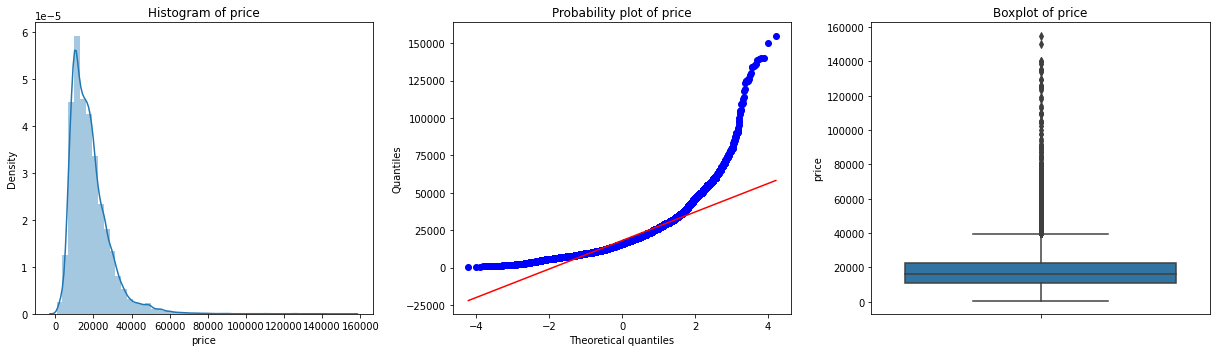

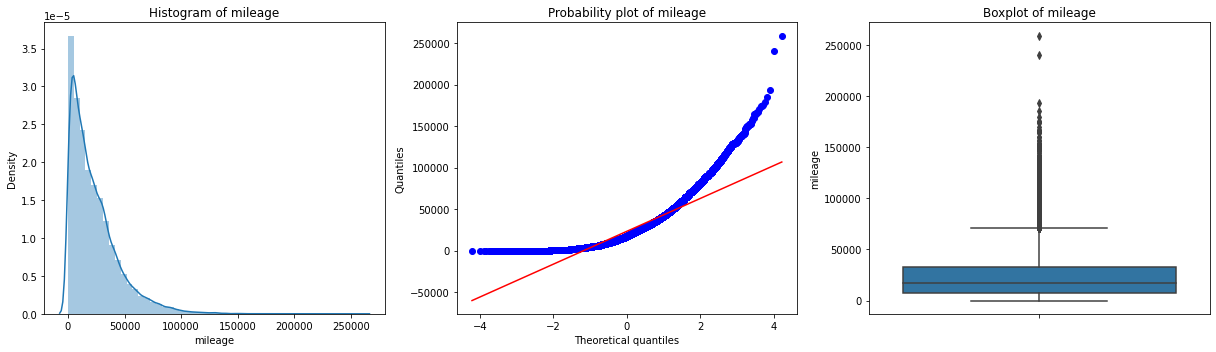

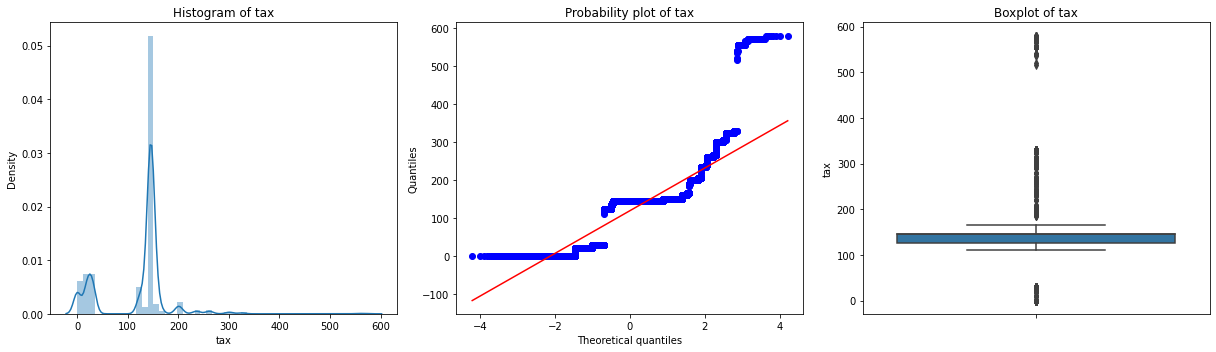

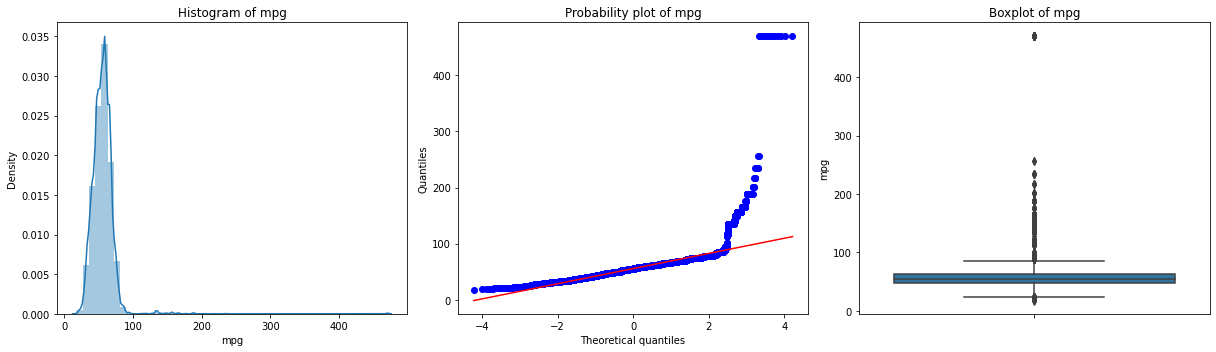

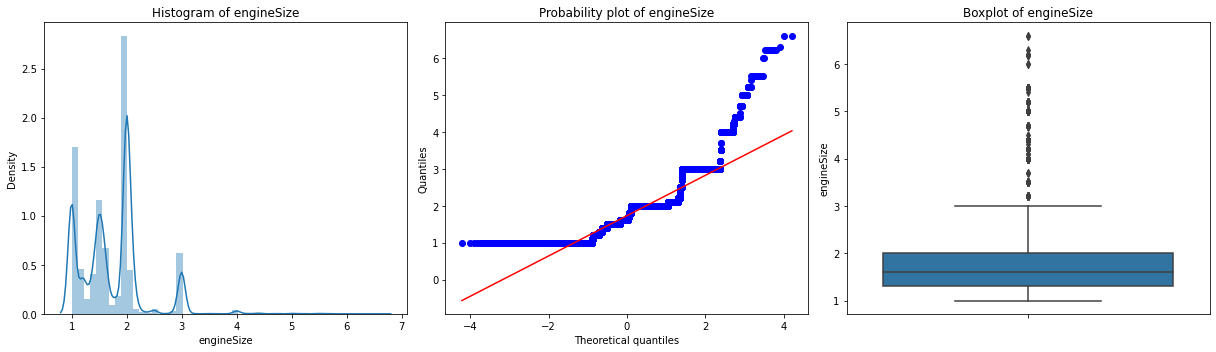

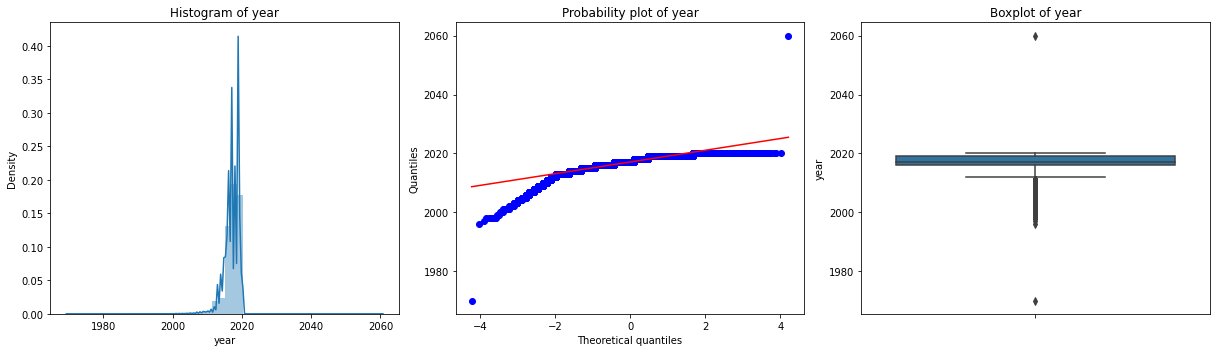

In [40]:
# Plot the plot the histogram, Q=Q plot and boxplot for each numerical variable
for col in num_columns:
    diagnostic_plots(df,col)
    plt.show();

### ***Dropping outliers in year, mileage, and mpg variables***
From above, we can see that the price, and mileage variables are right skewed, and the year variable is left skewed We can also see a few extreme outliers in some of the variables, including a few cars with mileage greater than 200,000, mpg greater than 300, year = 2060, and year less than 1980. We will create a function to drop these outliers.

In [41]:
def drop_outliers(df):
    # Filter the outliers by index
    indexNames = df[(df['year']<1980)|
                    (df['year']>2021)|
                   (df['mileage']>200000)|
                   (df['mpg']>300)].index
    # Drop the indexes
    df.drop(indexNames , inplace=True)
    df.reset_index(drop=True)

We will drop the outliers and run plot the distributions to visually verify the results.

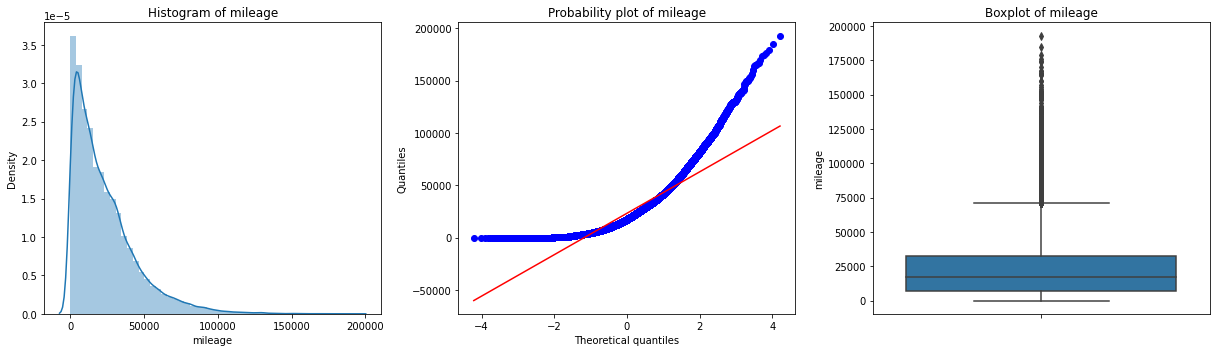

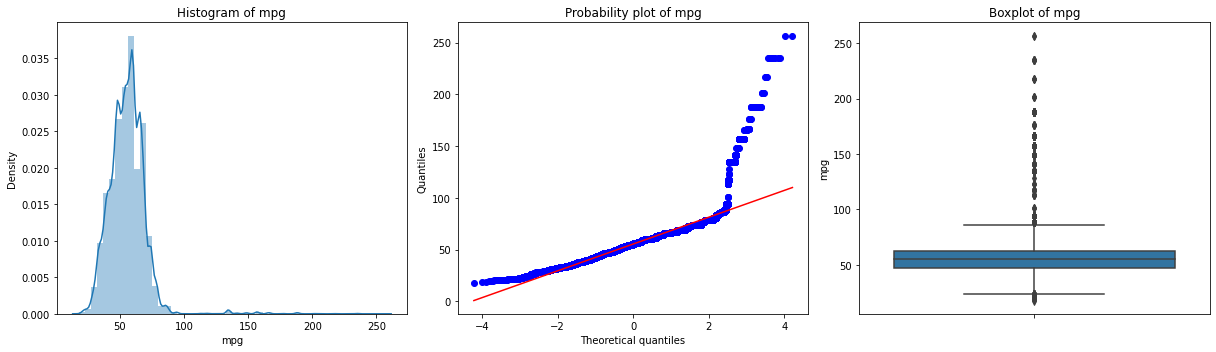

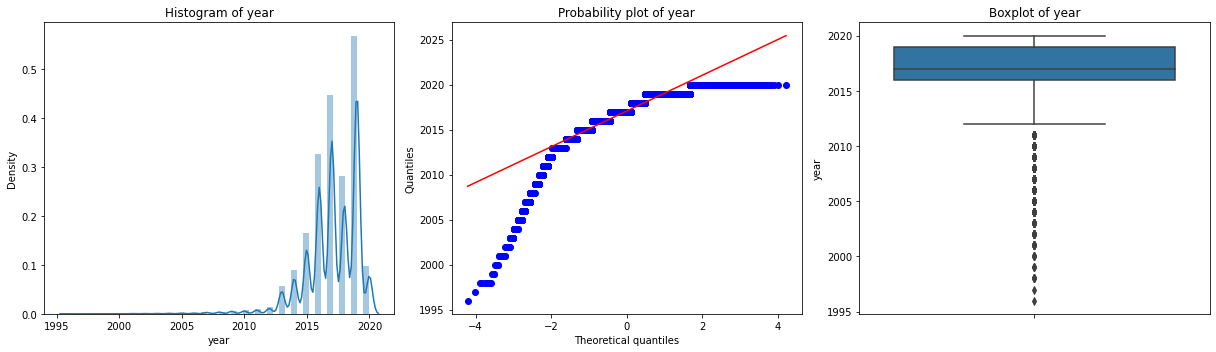

In [42]:
# Drop outliers
drop_outliers(df)

# Plot the plot the histogram, Q=Q plot and boxplot for each numerical variable
for col in ['mileage','mpg','year']:
    diagnostic_plots(df,col)
    plt.show();

### ***Bivariate plots of numerical features vs. target variable***
Now we will look at the scatterplot with a seaborn regplot that shows a linear regression model fit for each numerical feature versus the price. We have previously included price in the num_columns list of numerical features. We will exclude the price variable from the num_columns numerical feature list before graphing the regression plots.

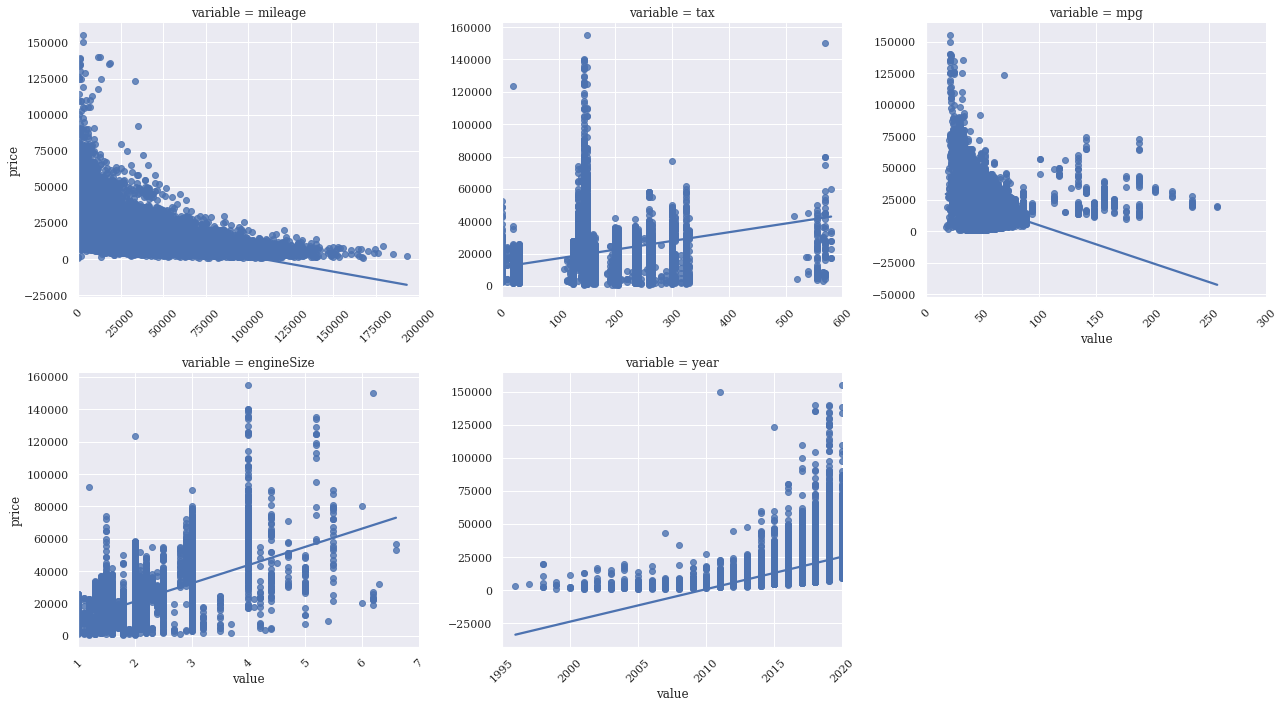

In [43]:
# Creating regression plots for our numerical variables
# Exclude the price variable by using num_columns[1:])
con = pd.melt(df, id_vars='price', value_vars=num_columns[1:])

sns.set_theme(style="darkgrid", font='serif', context='notebook')

g = sns.FacetGrid(con, col='variable', col_wrap=3, sharex=False, sharey=False, height=5, aspect=1.2)

g = g.map(sns.regplot, 'value', 'price', color='b', ci=None)

g.set_xticklabels(rotation=45)
g.tight_layout()

### ***Correlation heatmap of numerical features***
From above, we can see that the year and engineSize variables have a moderately strong positive correlation with price. This makes sense because it indicates that newer cars with bigger engines have higher values. Additionally, the mpg and mileage variables have moderately strong negative correlation with price. For the mileage variable this makes sense, because lower mileage cars have higher values, but the mpg and price correlation indicates cars with higher mpg have lower values. To better quantify the above relationships, we will next plot a heatmap that show the numerical variable correlations.

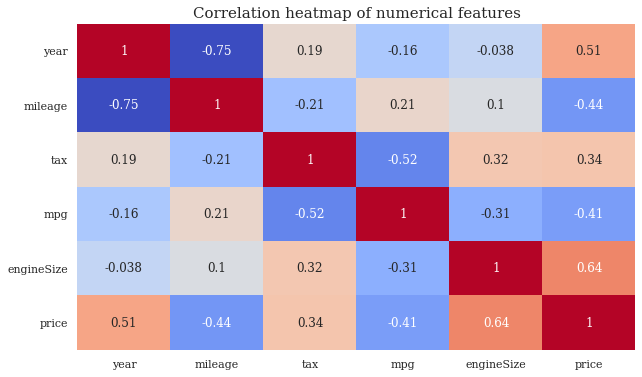

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True,
            cbar=False, fmt='.2g',cmap= 'coolwarm')
plt.title('Correlation heatmap of numerical features', fontsize=15);

### ***Countplots of categorical features***
From above, we can see moderately strong positive correlations between price and year (0.51) and engineSize (0.64). This makes sense because it indicates that newer cars with bigger engines have higher values. Additionally, we also see a moderately strong negative correlation between the price and mileage (-0.44) and a moderately strong negative correlation between the price and mpg (-0.41). For the mileage variable this makes sense, because lower mileage cars have higher values, but the mpg and price correlation indicates cars with higher mpg have lower values. We cannot determine why higher mpg cars tend to have lower prices, but it may be because the engineSize and mpg variables have a moderately strong negative correlation (-0.31).   
Next we will graph the countplots of the categorical variables. 

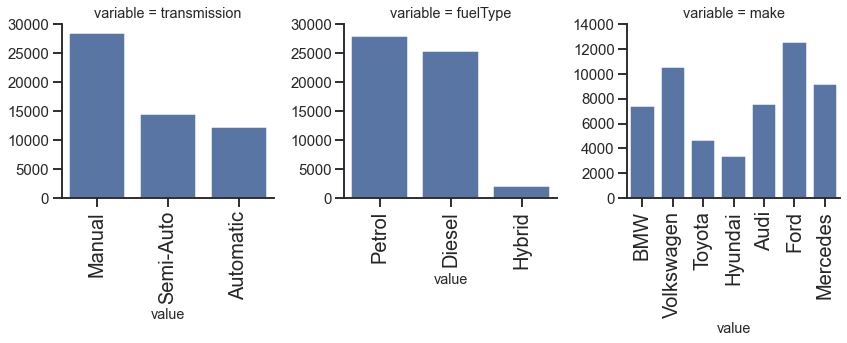

In [45]:
# Creating countplots for our categorical variables
cat_1 = pd.melt(df, value_vars=cat_columns)

sns.set_theme(style="ticks", context='talk', font='sans-serif', font_scale=.8)

g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=5,aspect=.8)

g = g.map(sns.countplot, 'value', color='b')

g.set_xticklabels(rotation=90, fontsize=20)
g.set_yticklabels(fontsize=15)
g.tight_layout()

From the above plots, we can see that there are almost as many manual transmissions as there are semi-auto and automatic combined. Additionally, there are very few hybrid vehicles. Next, we will graph the levels of the model variable.

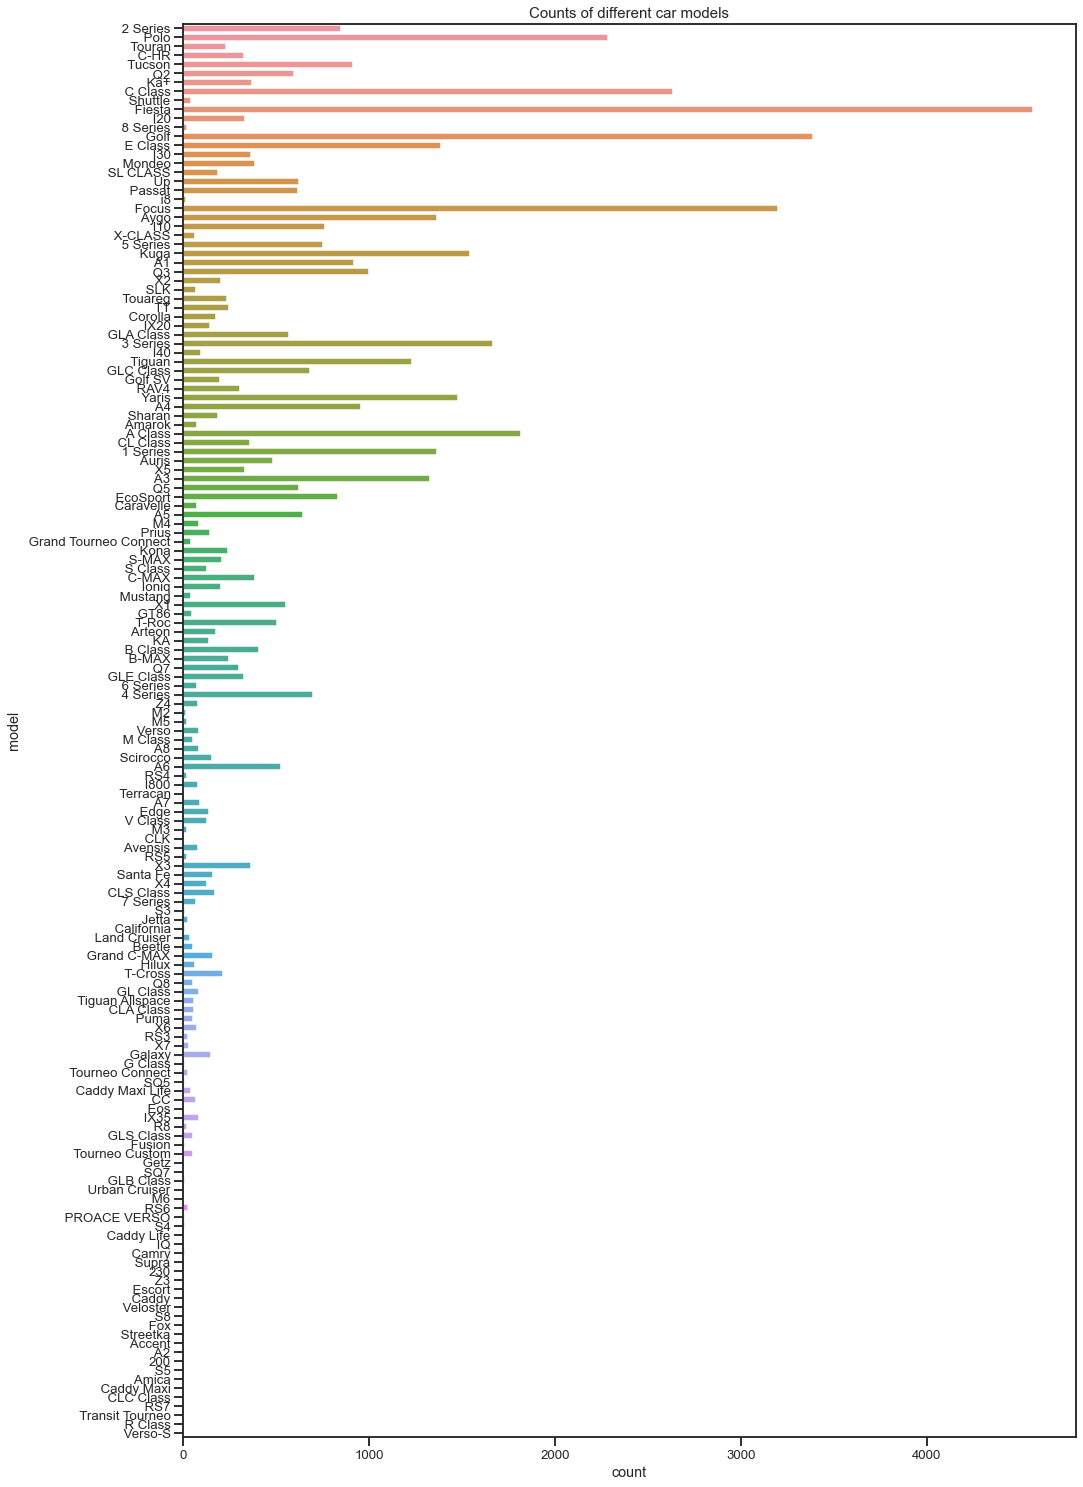

In [46]:
plt.rcParams['figure.figsize'] = (16, 26)
sns.countplot(y="model", data=df)
plt.title('Counts of different car models',fontsize=15);

### ***Boxplots of categorical features vs. target variable***
From the above, we can see that there are many different models with very low value counts. We can handle the rare levels as part of the model building process in PyCaret. Next, we will plot boxplots of the price for the categorical variables.

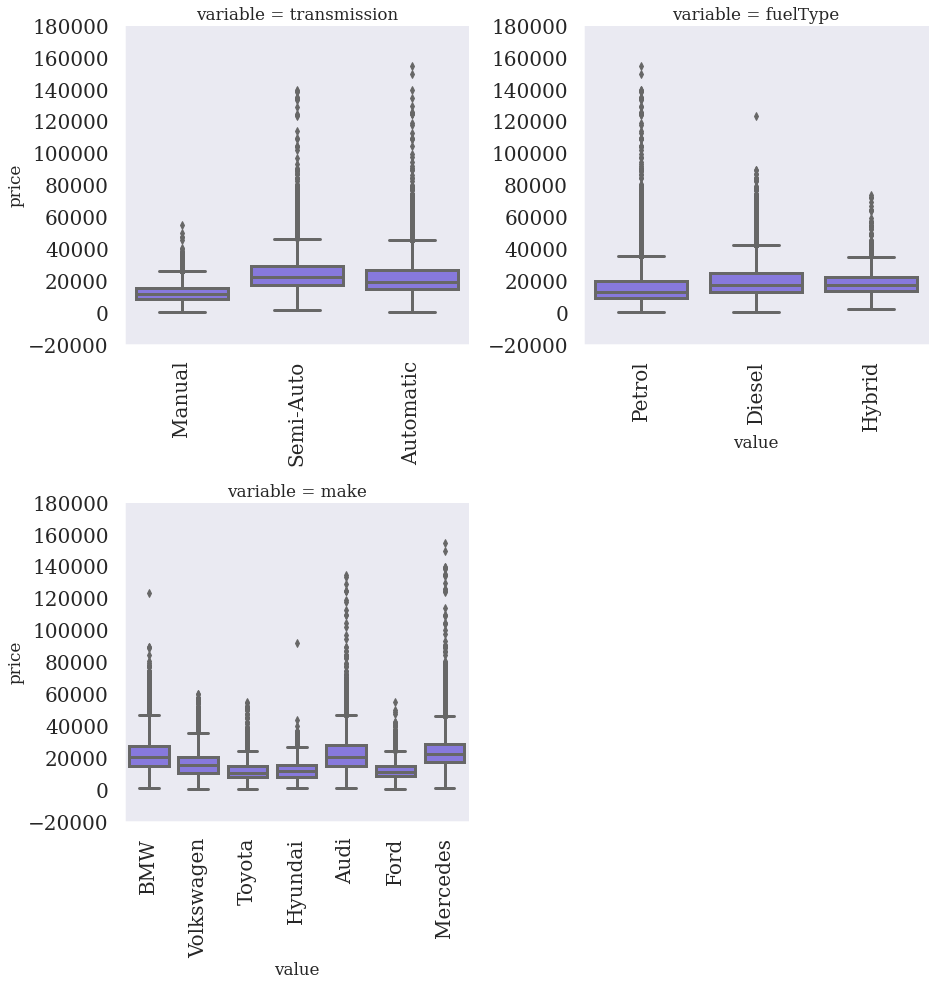

In [47]:
# Creating box plots for the categorical variables
cat_2 = pd.melt(df, id_vars='price', value_vars=cat_columns)

sns.set_theme(style="dark", context='poster', font='serif', font_scale=0.7)

g = sns.FacetGrid(cat_2, col='variable', col_wrap=2, sharex=False, sharey=False, height=7,aspect=.95)

g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
g.set_xticklabels(rotation=90, fontsize=20)
g.set_yticklabels(fontsize=20)
plt.tight_layout();

### ***Adding luxury type categorical feature***
From above, we can see that manual trasmissions are much cheaper than the other options. Additionally, BMW, Audi, and Mercedes are all more expensive than the other cars.  BMW, Audi, and Mercedes are considered luxury brands. We will create a luxury_type categorical variable to label the cars as "luxury" or "standard". To do this, we will create a function to first create a map of makes to the luxury type, and then create a luxury_type variable by mapping the make to luxury_type.

In [48]:
def add_luxury_type(df):
    make_to_luxury_type = { 'Mercedes': 'luxury', 'Audi': 'luxury','BMW': 'luxury',
                           'Ford': 'standard','Hyundai': 'standard',
                           'Volkswagen': 'standard','Toyota': 'standard'}
    df['luxury_type'] = df['make'].map(lambda x: make_to_luxury_type[x])

In [49]:
add_luxury_type(df)

#### ***Boxplot of luxury_type feature vs. target variable***
Next, we will create a boxplot of the newly created luxury_type variable vs price.

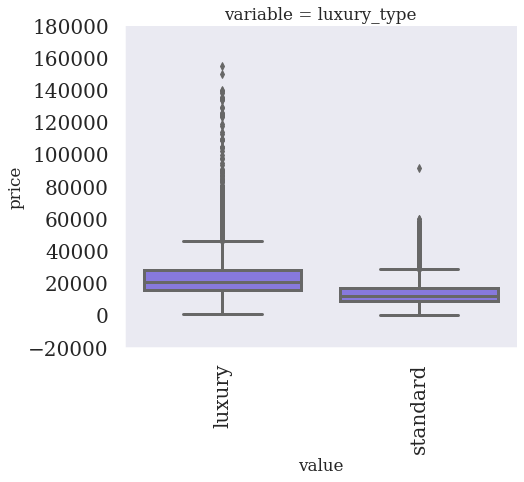

In [50]:
# Creating box plots for the categorical variables
cat_3 = pd.melt(df, id_vars='price', value_vars='luxury_type')

sns.set_theme(style="dark", context='poster', font='serif', font_scale=0.7)

g = sns.FacetGrid(cat_3, col='variable', col_wrap=2, sharex=False, sharey=False, height=7,aspect=.95)

g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
g.set_xticklabels(rotation=90, fontsize=20)
g.set_yticklabels(fontsize=20)
plt.tight_layout();

From the boxplot above, we can see a huge difference between the average prices of the two luxury types. This indicates that the luxury_type variable is likely very useful at estimating the price of a vehicle. The add_luxury_type function is the final function we will use for data pre-processing. We are now finished cleaning the training df, but we must also apply the same steps to the df_test dataframe. We can now construct a function that runs all of the pre-processing functions.

In [51]:
# A function that executes all of the preprocessing functions
def df_preprocessing_steps(df):
    replace_engineSize_zero_with_median(df)    
    replace_low_mileage_with_median(df)
    drop_transmission_level(df)
    drop_fuelType_level(df)
    drop_outliers(df)
    add_luxury_type(df)

### ***Apply preprocessing steps to test data***
None of the pre-processing functions above will cause data leakage from the training data to the testing data, as each step is specific to the dataframe the step is being performed on. For example, for the test data, the replace_engineSize_zero_with_median function will use the medians calculated from the test data, and not the training data. We will now perform the preprocessing steps on the df_test dataframe, and concatenate the training df with the df_test to create a data_cleaned_df. We will then use the data_cleaned_df to build models using the [PyCaret](https://pycaret.org/) library.

In [53]:
df_preprocessing_steps(df_test)
data_cleaned_df = pd.concat([df, df_test], axis=0)
data_cleaned_df.reset_index(drop=True, inplace=True)
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79002 entries, 0 to 79001
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         79002 non-null  object 
 1   year          79002 non-null  int64  
 2   transmission  79002 non-null  object 
 3   mileage       79002 non-null  int64  
 4   fuelType      79002 non-null  object 
 5   tax           79002 non-null  int64  
 6   mpg           79002 non-null  float64
 7   engineSize    79002 non-null  float64
 8   make          79002 non-null  object 
 9   price         79002 non-null  int64  
 10  luxury_type   79002 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 6.6+ MB


## ***Model building with the PyCaret library***
What is PyCaret?
[PyCaret](https://pycaret.org/) is an open source, low-code machine learning library in Python that allows you to quickly complete all the steps of the modeling process, including data preprocessing, feature engineering, and model tuning, plotting, and ensembling.  
We will be using PyCaret to do the following:  

    1. Compare baseline model scores  
    2. Feature engineering  
    3. Create new models using the engineered features  
    4. Create a boosting model using the engineered features  
    5. Create a bagging model using the engineered features
    6. Create a blended model using the engineered features
    7. Plot model performance  
    8. Create a final model  

### ***Create baseline models***
Creating baseline models in PyCaret is simple. You need only pass the dataframe and target variable as parameters inside the setup function. You can also pass a session_id parameter, which is equivalent to the random_state parameter in sklearn. PyCaret offers many custom settings in the setup function, many of which we will explore in later steps. First, we will create models from the original dataset prior to any data preparation or cleaning. 

In [54]:
# First we import all functions from pycaret.regression
from pycaret.regression import *

In [54]:
# Setup the regression using the original dataframe with no preprocessing or cleaning.
reg = setup(
    data=data, 
    target='price', 
    session_id=42,
    transform_target=True,
)

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(79288, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55501, 179)"


#### ***Baseline model results - original dataset with no preprocessing***

In [59]:
import time
start = time.time()
baseline_models = compare_models(n_select = 5, exclude = ['lar','par','llar'], fold=5)
end = time.time()
print(end - start)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1308.8365,4817397.9441,2189.8866,0.9548,0.0997,0.0733,9.1960
rf,Random Forest Regressor,1252.8122,4864328.0313,2200.7512,0.9544,0.1054,0.0725,11.4020
et,Extra Trees Regressor,1262.1255,4864803.3493,2200.7329,0.9544,0.1063,0.0735,17.4780
xgboost,Extreme Gradient Boosting,1373.2376,5244985.4000,2286.7609,0.9508,0.1059,0.0774,6.9940
lightgbm,Light Gradient Boosting Machine,1512.4595,7014618.8419,2644.8160,0.9342,0.1135,0.0834,0.4580
dt,Decision Tree Regressor,1581.2886,7847498.1394,2798.3655,0.9264,0.1371,0.0928,0.2640
gbr,Gradient Boosting Regressor,2108.2579,12223816.8915,3492.2225,0.8853,0.1512,0.1157,3.9800
br,Bayesian Ridge,1809.5364,13524203.2022,3599.4523,0.8711,0.1349,0.0994,0.6140
ridge,Ridge Regression,1810.5943,13581449.4000,3606.8039,0.8706,0.1349,0.0995,0.1220
lr,Linear Regression,1874.4127,14381195.0000,3713.5286,0.8629,0.1402,0.1036,0.7700


401.23028206825256


From above, we can see that the models have fairly good performance, even without normalization of the variables, although some of the distance-based algorithms, like K Neighbors Regressor, had poor performance. Next, we will create models using the preprocessed data set. With PyCaret we can run multiple models at once, making it is easy to check how the preprocessing steps affected the performance of our models. Based on the above model results, we will be creating models using the top Regressors: catboost, random forest, extra trees, extreme gradient boositing, and light gradient boosting. We will also include linear regression as a reference.

In [57]:
# Setup the regression using the preprocessed data, without the luxury_type
reg = setup(
    data=data_cleaned_df, 
    target='price', 
    session_id=42,
    ignore_features=['luxury_type'],
    transform_target=True
)

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(79002, 11)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55301, 172)"


#### ***Baseline model results - after preprocessing but before adding new features***

In [58]:
import time
start = time.time()
models = ['lr','lightgbm','rf','et','catboost','xgboost']
compare_models(n_select = 5, include = models, fold=5)
end = time.time()
print(end - start)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1300.7116,4461113.2859,2109.3782,0.9584,0.0989,0.0728,8.5420
et,Extra Trees Regressor,1266.1621,4500797.6848,2118.4954,0.9580,0.1050,0.0737,17.1040
rf,Random Forest Regressor,1252.9935,4635934.6018,2150.1402,0.9568,0.1044,0.0725,11.5760
xgboost,Extreme Gradient Boosting,1371.1532,4911842.9000,2214.9315,0.9543,0.1051,0.0771,6.6300
lightgbm,Light Gradient Boosting Machine,1502.5054,6661726.4450,2578.2893,0.9379,0.1126,0.0829,0.3320
lr,Linear Regression,1853.6501,9752153.8000,3121.7710,0.9094,0.1331,0.1015,0.3440


281.0615904331207


The linear regression R2 score jumped up to almost 0.91, and the other linear regression metrics had similar improvements. Additionally there were also moderate performance increases in most metrics across the top models. These improvements were achieved entirely due to applying the preprocessing steps created during exploratory data analysis. Next, we will use PyCaret to explore feature engineering.

### ***Feature engineering***  
To start, we will create a vehicle_age feature to represent the current age of the vehicle. By definition, this feature will have a perfect correlation with the year variable, and so only one of them should be included in model-building. We will also add the avg_reliability_rating variable. The avg_reliability_rating variable is derived from an average of the Reliability index scores of each car make. The higher the Reliability Index score, the worse the car is, and the lower the score, the better. We are including this variable because we believe consumers factor in the reliability of a car prior to purchasing it. More information about what the Reliability index is, and how it is calculated can be found at the reliability index website [here](https://www.reliabilityindex.com/).  

The reliability index for each car make was scraped from the reliability index website [here](https://www.reliabilityindex.com/). The jupyter notebook with details and code for the web-scraping can be found [here](https://github.com/DanZylkowski/DSC-630-Final-Project/blob/main/UK%20Reliability%20index%20web%20scraping.ipynb). While the vehicle_age and avg_reliability_rating are not engineered features, they will be used in feature engineering. We will create functions to add these two variables.

#### ***Adding average reliability rating and vehicle_age variables***

In [60]:
# Create the vehicle_age variable
from datetime import date
def create_vehicle_age(df):
    current_year = date.today().year
    df['vehicle_age'] = current_year - df['year']
 
# Create a function to add the avg_reliability_rating variable.
def add_reliability_rating(df):
    df_reliability_index = pd.read_csv('make_avg_reliablity_ratings.csv')
    df = pd.merge(df,
                 df_reliability_index[['make', 'avg_reliability_rating']],
                 on='make', 
                 how='left')
    return df

In [61]:
# Run the above functions on the data_cleaned_df
create_vehicle_age(data_cleaned_df)
data_cleaned_df = add_reliability_rating(data_cleaned_df)

In [62]:
# Verify the new variables 
data_cleaned_df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price,luxury_type,vehicle_age,avg_reliability_rating
0,2 Series,2018,Manual,6889,Petrol,145,57.6,1.5,BMW,15700,luxury,3,249
1,Polo,2016,Semi-Auto,13321,Petrol,20,60.1,1.2,Volkswagen,11990,standard,5,121
2,Touran,2016,Manual,47701,Diesel,30,64.2,2.0,Volkswagen,15498,standard,5,121
3,C-HR,2018,Automatic,14906,Hybrid,140,74.3,1.8,Toyota,21000,standard,3,64
4,Polo,2019,Semi-Auto,3346,Petrol,145,39.8,2.0,Volkswagen,19293,standard,2,121


#### ***Creating baseline models for feature engineering***
Next, we will use use PyCaret to create features by using the feature_interaction and feature_ratio parameters inside the setup function. Feature interaction creates new features by multiplying two variables (a * b), while feature ratios create new features but by calculating the ratios of existing features (a / b). Features whose importance based on the combination of Random Forest, AdaBoost and Linear correlation falls within the percentile of the defined threshold are kept in the dataset. Remaining features are dropped before further processing. You can read more about how feature_interaction works in the PyCaret docs [here](https://pycaret.org/feature-interaction/). Please note that we will only be using the top 3 models to when comparing models for feature engineering. To avoid exploding the feature space, we will not use the model variable. As a result, we will have slightly worse model performance. This is not a problem, since we are only creating these models to analyze the feature importance of the models.

In [63]:
reg = setup(
    data=data_cleaned_df, 
    target='price', 
    feature_interaction=True,
    feature_ratio=True,
    feature_selection=True,
    feature_selection_threshold=0.9,
    ignore_features = ['model','year'],
    numeric_features = ['avg_reliability_rating'],                     
    session_id=42,
    transform_target=True,
)

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(79002, 13)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55301, 28)"


In [64]:
import time
start = time.time()
models = ['rf','et','catboost']
feature_engineering_models = compare_models(n_select = 3, include = models, fold=5)
end = time.time()
print(end - start)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1450.8948,6454095.6089,2538.6195,0.9399,0.1161,0.0817,7.8440
catboost,CatBoost Regressor,1505.6205,6514607.8526,2550.8932,0.9393,0.1121,0.0824,7.5720
et,Extra Trees Regressor,1484.8531,6839360.2500,2612.4824,0.9363,0.1199,0.0841,5.4600


128.32367134094238


#### ***Plot feature importance***
Next, we will plot the important features of each model. In PyCaret, you can easily plot feature importance using one line of code. You can read more about how to plot models in the PyCaret docs [here](https://pycaret.org/plot-model/). First we will define a function that plots the feature importance. The above code created a list of fit models in the feature_engineering_models list. We can pass each element of the list as a parameter to plot the feature importance of each model.

In [66]:
sns.set()
def plot_features(model):
    plot_model(model,plot='feature')

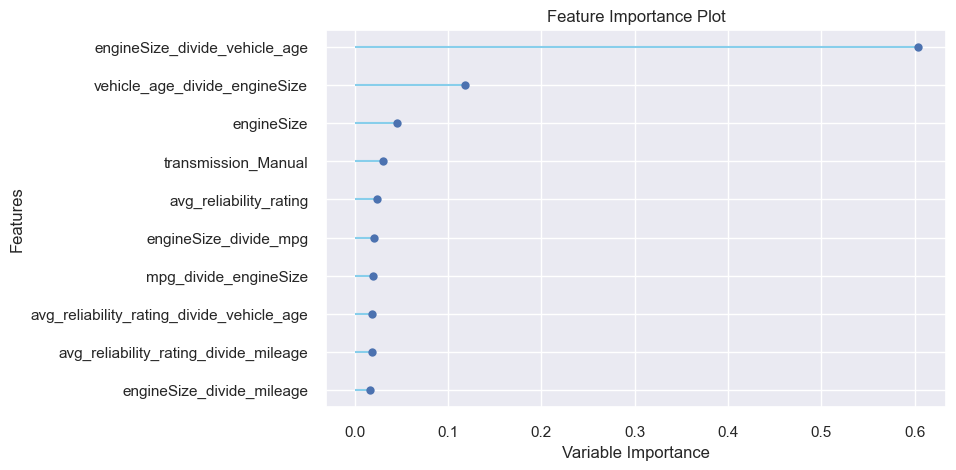

In [69]:
# Plot feature importance for Random Forest
plot_features(feature_engineering_models[0])

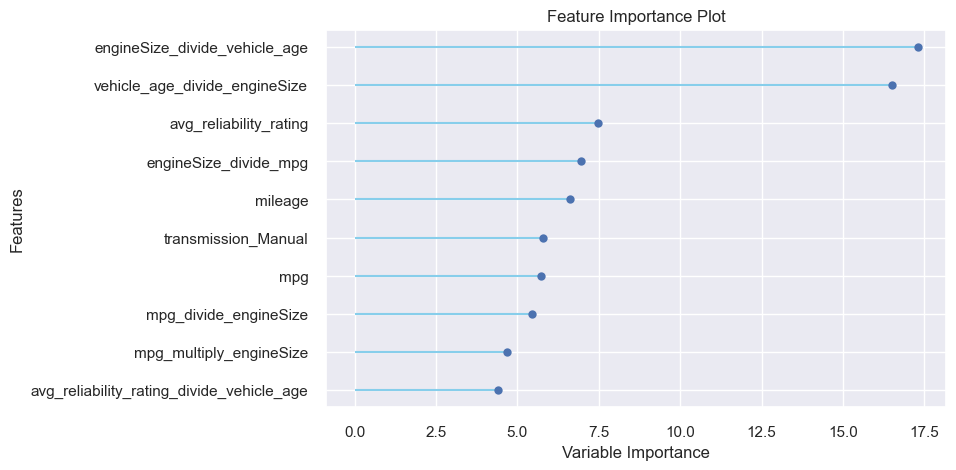

In [90]:
# Plot feature importance for Catboost
plot_features(feature_engineering_models[1])

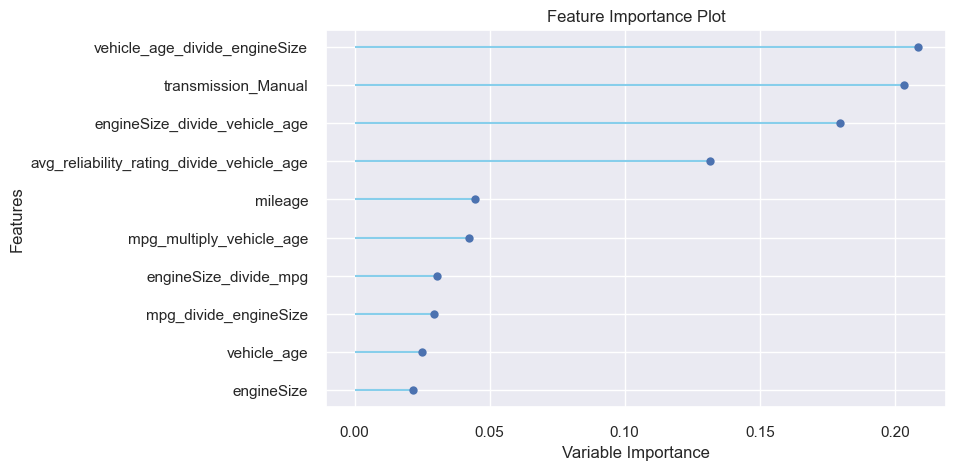

In [91]:
# Plot feature importance for Extra trees
plot_features(feature_engineering_models[2])

#### ***Add new features using feature importance***
From the feature importance plots above, we see that several features have high importance in multiple plots. We will create a function to add four of these features (engineSize_divide_vehicle_age, mpg_multiply_vehicle_age, avg_reliability_rating_divide_vehicle_age, and mpg_divide_engineSize) to the dataframe.

In [57]:
def add_features(df):
    df['engineSize_divide_vehicle_age'] = df['engineSize']/df['vehicle_age']
    df['mpg_multiply_vehicle_age'] = df['mpg']*df['vehicle_age']
    df['avg_reliability_rating_divide_vehicle_age'] = df['avg_reliability_rating']/df['vehicle_age']
    df['mpg_divide_engineSize'] = df['mpg']/df['engineSize']

In [58]:
# Call the function to add the new features
add_features(data_cleaned_df)

# Verify the columns were added
data_cleaned_df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,make,price,luxury_type,vehicle_age,avg_reliability_rating,engineSize_divide_vehicle_age,mpg_multiply_vehicle_age,avg_reliability_rating_divide_vehicle_age,mpg_divide_engineSize
0,2 Series,2018,Manual,6889,Petrol,145,57.6,1.5,BMW,15700,luxury,3,249,0.50,172.8,83.000000,38.400000
1,Polo,2016,Semi-Auto,13321,Petrol,20,60.1,1.2,Volkswagen,11990,standard,5,121,0.24,300.5,24.200000,50.083333
2,Touran,2016,Manual,47701,Diesel,30,64.2,2.0,Volkswagen,15498,standard,5,121,0.40,321.0,24.200000,32.100000
3,C-HR,2018,Automatic,14906,Hybrid,140,74.3,1.8,Toyota,21000,standard,3,64,0.60,222.9,21.333333,41.277778
4,Polo,2019,Semi-Auto,3346,Petrol,145,39.8,2.0,Volkswagen,19293,standard,2,121,1.00,79.6,60.500000,19.900000


### ***Create new models using the engineered features***
We will use the previous top models and also include K Neighbors Regressor. We will also normalize the data.

In [59]:
reg = setup(
    data=data_cleaned_df, 
    target='price', 
    ignore_features = ['year'],
    numeric_features = ['avg_reliability_rating'],                     
    session_id=42,
    normalize=True,
    normalize_method='robust',
    transform_target=True,
)

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(79002, 17)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55301, 178)"


#### ***Modeling results after preprocessing and after adding new features***

In [61]:
import time
start = time.time()
models = ['lr','knn','lightgbm','rf','et','catboost','xgboost']
top_models = compare_models(n_select = 5, include = models, fold=5)
end = time.time()
print(end - start)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1286.7733,4430086.6371,2101.9463,0.9587,0.0979,0.0719,7.8580
et,Extra Trees Regressor,1259.6119,4501962.9718,2118.5974,0.9580,0.1037,0.0729,16.2540
rf,Random Forest Regressor,1239.7949,4550372.6438,2129.7354,0.9576,0.1029,0.0715,13.0280
xgboost,Extreme Gradient Boosting,1350.4506,4888782.7000,2208.7796,0.9544,0.1034,0.0756,6.8100
knn,K Neighbors Regressor,1361.9243,6041224.7782,2452.4711,0.9436,0.1102,0.0772,3.5420
lightgbm,Light Gradient Boosting Machine,1479.3297,6500076.1964,2545.4297,0.9394,0.1108,0.0816,0.7500


312.53154468536377


From above, we saw incremental improvement across almost all model performance metrics. Additionally, we saw how the knn model is now a top 5 model after normalization. Next, we will plot the feature importance of the top model (Catboost).

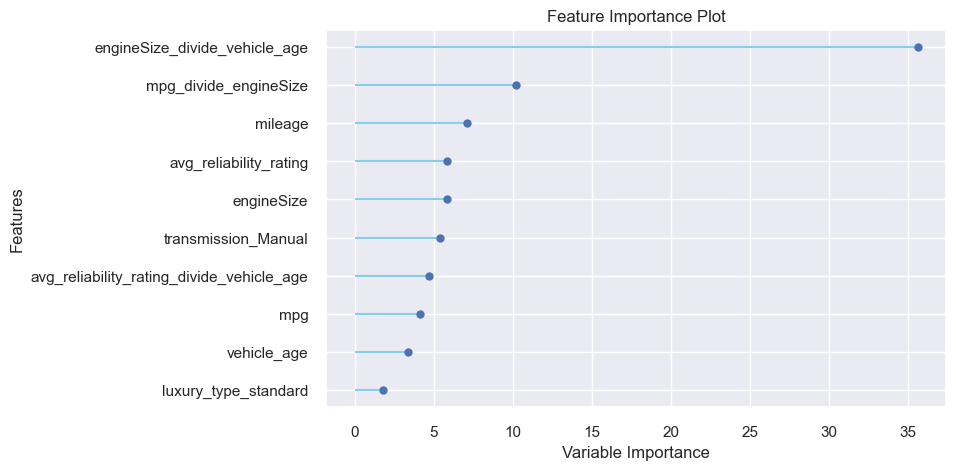

In [65]:
sns.set()
plot_features(top_models[0])

From the plot above, we can see that three out of the top four features (engineSize_divide_vehicle_age, mpg_divid_engineSize, and avg_reliability_rating) were engineered or added to the original dataset.

### ***Create a boosting model using the engineered features***
Boosting focuses on that focuses on producing an ensemble model with less bias than its components (even if variance can also be reduced). We can create a boosting model in PyCaret by passing a model to the ensemble_model function, and specifiying the method = 'Boosting'. We will create a boosting model using the extra trees regressor, which is the 1st index of the top_models list that we created.

In [66]:
import time
start = time.time()
boosted_et = ensemble_model(top_models[1], method = 'Boosting', fold=5)
end = time.time()
print(end - start)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1245.2308,4706631.2356,2169.4772,0.9562,0.1036,0.0720
1,1221.1705,4866437.7751,2206.0004,0.9523,0.1024,0.0715
2,1262.0617,4170058.6069,2042.0721,0.9636,0.1015,0.0727
3,1215.8906,4017586.0470,2004.3917,0.9623,0.1021,0.0712
4,1252.4874,4134663.4282,2033.3872,0.9616,0.1017,0.0716
Mean,1239.3682,4379075.4185,2091.0657,0.9592,0.1022,0.0718
SD,17.9099,340268.9214,80.7439,0.0043,0.0007,0.0005


2119.699081659317


### ***Create a bagging model using the engineered features***
Bagging is a type of ensemble method that focuses on getting an ensemble model with less variance than its components. We can create a bagging model in PyCaret by passing the base model to the ensemble_model function. We will create a bagging model using the extra trees regressor, which is the 1st index of the top_models list that we created. 

In [103]:
import time
start = time.time()
bagged_et = ensemble_model(top_models[1],fold=5)
end = time.time()
print(end - start)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1212.0730,4545335.6312,2131.9793,0.9577,0.1004,0.0697
1,1188.9424,5025811.2273,2241.8321,0.9507,0.0996,0.0690
2,1227.1476,4088070.6383,2021.8978,0.9643,0.0985,0.0704
3,1170.2277,3535405.2275,1880.2673,0.9668,0.0979,0.0683
4,1224.9402,4075858.2822,2018.8755,0.9622,0.0984,0.0694
Mean,1204.6662,4254096.2013,2058.9704,0.9603,0.0990,0.0694
SD,21.9297,501241.3483,121.3964,0.0057,0.0009,0.0007


878.7484850883484


### ***Create a blended model using the engineered features***
Blending is another common technique for ensembling that can be used in PyCaret. It creates multiple models and then averages the individual predictions to form a final prediction. We will blend the top 3 models, which are the first 3 indexes of the top_models list that we created.

In [111]:
# train individual models to blend
import time
start = time.time()
blend_hard = blend_models(estimator_list = top_models[:3])
end = time.time()
print(end - start)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1174.3486,3703035.4661,1924.3273,0.9663,0.0975,0.0675
1,1161.9823,4452528.7895,2110.1016,0.9575,0.0938,0.0662
2,1170.9831,5756389.9527,2399.2478,0.9410,0.0996,0.0678
3,1138.6808,3395386.7182,1842.6575,0.9681,0.0897,0.0656
4,1220.2537,3868530.6795,1966.8581,0.9673,0.0939,0.0684
5,1149.1336,3364178.4687,1834.1697,0.9696,0.0938,0.0671
6,1150.9393,3383685.8459,1839.4798,0.9686,0.0954,0.0666
7,1116.3978,2980912.0555,1726.5318,0.9717,0.0904,0.0651
8,1173.3733,3672058.6058,1916.2616,0.9657,0.0919,0.0664
9,1176.4441,3507698.1653,1872.8850,0.9676,0.0937,0.0663


567.7834491729736
